In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import numpy as np

# Import Data

In [7]:
Random = pd.read_excel ('../../Data/Total Year Round Random 1.xlsx')

# Wrangle Data

In [8]:
x = Random[['California', 'Texas', 'New York', 'Florida', 'Louisiana', 'Illinois']]

In [4]:
y = Random['Years']

# Train Test Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .4)

In [6]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(7, 6) (7,)
(5, 6) (5,)


# Create Linear Regression Model

In [7]:
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

# Examine Predictions

In [8]:
predictions = lm.predict(x_test)
predictions

array([2020.29201174, 2019.36025206, 2012.18680117, 2016.47551578,
       2021.95386984])

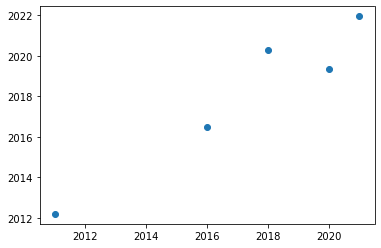

In [9]:
plt.scatter(y_test, predictions)

# Accuracy Score

In [10]:
print("Score:", lm.score(x_test, y_test))

Score: 0.8693140898695454


# Data Accurate 87% of the time.

# Examine Error

# Mean Absolute Error (MAE)

In [11]:
metrics.mean_absolute_error(y_test, predictions)

1.1095892913206171

# Mean Squared Error (MSE)

In [12]:
metrics.mean_squared_error(y_test, predictions)

1.6414150312385103

# Root Mean Squared Error (RMSE)

In [13]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

1.281177205244657

# k-Fold Cross Validation 

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# Create Folds

In [15]:
kfold = KFold(3, True, 1)
for train, test in kfold.split(x,y):
    print('train: %s, test: %s' % (train,test))

train: [ 0  1  5  6  7  8  9 11], test: [ 2  3  4 10]
train: [ 2  3  4  5  8  9 10 11], test: [0 1 6 7]
train: [ 0  1  2  3  4  6  7 10], test: [ 5  8  9 11]


/Users/lakisha/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [16]:
print(cross_val_score(lm, x,y, cv=3))

[  0.38086417  -1.11948906 -38.29464176]
